<a href="https://colab.research.google.com/github/Kingdms/pension_record_project/blob/main/Yet_another_copy_of_Pension_records_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
from scipy.stats import multivariate_normal as mvn

In [7]:
df_train = pd.read_csv("/content/drive/MyDrive/DataSet/MNIST_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/DataSet/MNIST_test.csv")



In [8]:
df_train

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 360.3 MB


In [11]:
df_train.shape

(60000, 787)

In [12]:
df_train = df_train.iloc[:, 2:]
y_train = df_train.iloc[:, 0].to_numpy()
X_train = df_train.iloc[:, 1:].to_numpy()

In [13]:
df_train.shape

(60000, 785)

In [14]:
df_train.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_test = pd.read_csv("/content/drive/MyDrive/DataSet/MNIST_test.csv")


In [16]:
df_test.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_test.shape

(10000, 787)

In [18]:
df_test = df_test.iloc[:, 2:]
y_test = df_test.iloc[:, 0].to_numpy()
X_test = df_test.iloc[:, 1:].to_numpy()

In [19]:
df_test.shape

(10000, 785)

In [20]:
df_test.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [22]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#Normalizing the feature Data

In [23]:
epsilon = 1e-8  # To prevent division by zero

X_train = X_train / (X_train.max(axis=0) + epsilon)
X_test = X_test / (X_test.max(axis=0) + epsilon)

#Model using Naive Bayes Classifier

In [24]:
class GaussNB():

  def fit(self, X, y, epsilon = 1):

    self.likelihoods = dict()
    self.priors= dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y==k]
      self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov": X_k.var(axis=0)+epsilon}
      self.priors[k]=len(X_k)/len(X)

  def predict(self, X):
    N,D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:, k] = mvn.logpdf(X, l["mean"],l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

#Train and Test the Model

In [25]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Train and predict
nb = GaussNB()
nb.fit(X_train, y_train)

# Predictions
test_preds = nb.predict(X_test)
train_preds = nb.predict(X_train)

# Accuracy
test_acc = accuracy(y_test, test_preds)
train_acc = accuracy(y_train, train_preds)

# Display accuracy values (Colab auto-displays last statement in cell)
test_acc, train_acc

(np.float64(0.6791), np.float64(0.66))

# PLot Accuracy for difference

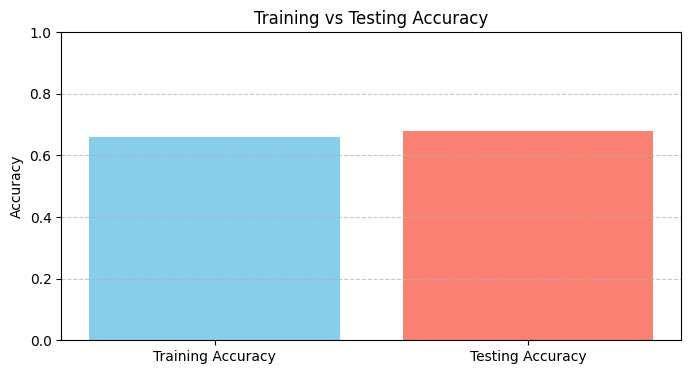

In [26]:
accuracies = [train_acc, test_acc]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 4))
plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

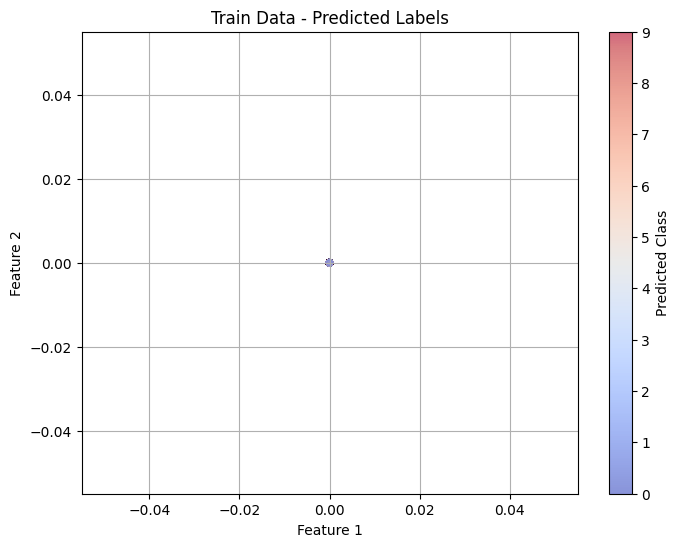

In [27]:
plt.figure(figsize=(8, 6))

plt.scatter(X_train[:, 0], X_train[:, 1], c=train_preds, cmap='coolwarm', alpha=0.6, s=20)
plt.title("Train Data - Predicted Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Predicted Class")
plt.grid(True)
plt.show()


#Non Naive Bayes Algorithm

In [28]:
class GuassBayes():
  def fit(self,X,y,epsilon = 1):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k,D = X_k.shape
      mu_k = X_k.mean(axis = 0)
      self.likelihoods[k] = {"mean": X_k.mean(axis=0),
                             "cov":(1/(N_k-1) ) * np.matmul((X_k - mu_k).T,X_k-mu_k) + epsilon * np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self,X):
    N,D = X.shape
    p_hat = np.zeros((N,len(self.K)))

    for k,l in self.likelihoods.items():
      p_hat[:,k] = mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])

    return p_hat.argmax(axis = 1)

In [29]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

start_time = time.time()
# Train and predict
nb = GuassBayes()
nb.fit(X_train, y_train)

test_preds = nb.predict(X_test)
train_preds = nb.predict(X_train)
end_time = time.time()

test_acc = accuracy(y_test, test_preds)
train_acc = accuracy(y_train, train_preds)

test_acc, train_acc, time

(np.float64(0.8847), np.float64(0.8785), <module 'time' (built-in)>)

#KNN model

In [30]:
class KNNClasssifier():
  def fit(self,X,y):
    self.X = X
    self.y = y

  def predict(self,X,K, epsilon = 1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i]) ** 2, axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))


      y_hat[i] = np.bincount(self.y[idxt],weights=gamma_k).argmax()

    return y_hat

In [39]:
knn_instance = KNNClasssifier()
knn_instance.fit(X_train, y_train)

# Time how long prediction takes
start_time = time.time()
knn_instance_hat = knn_instance.predict(X_test,K = 3)
end_time = time.time()

# Show results
accuracy = np.mean(knn_instance_hat == y_test)

In [41]:
accuracy

np.float64(0.9717)